<a href="https://colab.research.google.com/github/Juanezm/uoc-data-science-tfm/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt


sensor_ids = [
    '200034001951343334363036',
    '270043001951343334363036',
    '380033001951343334363036',
    '46004e000251353337353037',
    '46005a000351353337353037',
    '4e0022000251353337353037',
    '4e0031000251353337353037',
]


sensor1_raw_data = pd.read_csv('../src/data/200034001951343334363036_raw_data.csv', usecols=["date", "value", "variable", "units", "range"])
sensor1_raw_data

date      value     variable       units      range
0       2018-04-01 00:04:04.340  14.325957  Temperature  Centigrade  [-10, 85]
1       2018-04-01 00:14:03.711  14.325957  Temperature  Centigrade  [-10, 85]
2       2018-04-01 00:24:04.259  14.304507  Temperature  Centigrade  [-10, 85]
3       2018-04-01 00:34:04.284  14.079280  Temperature  Centigrade  [-10, 85]
4       2018-04-01 00:44:04.253  14.047105  Temperature  Centigrade  [-10, 85]
...                         ...        ...          ...         ...        ...
172765  2018-09-14 15:00:06.471  95.917969      Battery  Percentage   [0, 100]
172766  2018-09-14 15:02:21.863  97.660156      Battery  Percentage   [0, 100]
172767  2018-09-14 15:03:53.179  97.183594      Battery  Percentage   [0, 100]
172768  2018-09-14 17:27:45.030  87.351563      Battery  Percentage   [0, 100]
172769  2018-09-14 17:37:43.649  97.660156      Battery  Percentage   [0, 100]

[172770 rows x 5 columns]

In [ ]:
# Convert Unix timestamps to datetime format
for i in range(len(sensor1_raw_data)):
    if isinstance(sensor1_raw_data['date'][i], str) and len(sensor1_raw_data['date'][i]) == 10:
        sensor1_raw_data.loc[i, 'date'] = datetime.datetime.fromtimestamp(int(sensor1_raw_data['date'][i]))

# Convert remaining strings to datetime format
sensor1_raw_data['date'] = pd.to_datetime(sensor1_raw_data['date'], errors='coerce')
sensor1_raw_data

date      value     variable       units      range
0      2018-04-01 00:04:04.340  14.325957  Temperature  Centigrade  [-10, 85]
1      2018-04-01 00:14:03.711  14.325957  Temperature  Centigrade  [-10, 85]
2      2018-04-01 00:24:04.259  14.304507  Temperature  Centigrade  [-10, 85]
3      2018-04-01 00:34:04.284  14.079280  Temperature  Centigrade  [-10, 85]
4      2018-04-01 00:44:04.253  14.047105  Temperature  Centigrade  [-10, 85]
...                        ...        ...          ...         ...        ...
172765 2018-09-14 15:00:06.471  95.917969      Battery  Percentage   [0, 100]
172766 2018-09-14 15:02:21.863  97.660156      Battery  Percentage   [0, 100]
172767 2018-09-14 15:03:53.179  97.183594      Battery  Percentage   [0, 100]
172768 2018-09-14 17:27:45.030  87.351563      Battery  Percentage   [0, 100]
172769 2018-09-14 17:37:43.649  97.660156      Battery  Percentage   [0, 100]

[172770 rows x 5 columns]

In [ ]:
sensor1_raw_data['date'].isna().sum()

0

In [ ]:
# Set the date column as the index and sort by date
sensor1_raw_data = sensor1_raw_data.set_index('date').sort_index()
sensor1_raw_data

value             variable                units  \
date                                                                            
2018-03-31 22:04:47.000    0.000000       Wind direction  Direction (degrees)   
2018-03-31 22:14:47.000   -1.000000       Wind direction  Direction (degrees)   
2018-03-31 22:24:47.000   -1.000000       Wind direction  Direction (degrees)   
2018-03-31 22:34:47.000    4.000000       Wind direction  Direction (degrees)   
2018-03-31 22:44:47.000    0.000000       Wind direction  Direction (degrees)   
...                             ...                  ...                  ...   
2018-09-14 17:37:42.401    0.000000           Rain meter     millilitres (mm)   
2018-09-14 17:37:42.821    0.000000           Wind speed                 km/h   
2018-09-14 17:37:43.019    0.000000  Barometric pressure          Hectopascal   
2018-09-14 17:37:43.439  721.000000        Soil moisture           Percentage   
2018-09-14 17:37:43.649   97.660156              Battery           Percentage   

                               range  
date                                  
2018-03-31 22:04:47.000      [-1, 7]  
2018-03-31 22:14:47.000      [-1, 7]  
2018-03-31 22:24:47.000      [-1, 7]  
2018-03-31 22:34:47.000      [-1, 7]  
2018-03-31 22:44:47.000      [-1, 7]  
...                              ...  
2018-09-14 17:37:42.401      [-1, 7]  
2018-09-14 17:37:42.821          NaN  
2018-09-14 17:37:43.019  [500, 1100]  
2018-09-14 17:37:43.439      [0, 85]  
2018-09-14 17:37:43.649     [0, 100]  

[172770 rows x 4 columns]

In [ ]:
# Filter the data by variable
soilmoist_data = sensor1_raw_data[sensor1_raw_data['variable'] == 'Soil moisture']

# Apply the remapping function to the values
sensor1_raw_data.loc[sensor1_raw_data['variable'] == 'Soil moisture', 'value'] = (soilmoist_data['value'] / 4096) * 100

In [ ]:
def convert_range_string_to_interval(range_string):
    if pd.isna(range_string) or range_string == 'NaN' or range_string == 'nan':
        return None
    # Remove the square brackets
    range_string = range_string.strip('[]')
    # Split the string by comma
    range_values = range_string.split(',')
    # Convert the values to float or int
    range_values = [float(x) if '.' in x else int(x) for x in range_values]
    # Create a tuple for the interval
    range_interval = tuple(range_values)
    return range_interval

# Convert the range column to interval tuples
sensor1_raw_data['range'] = sensor1_raw_data['range'].apply(convert_range_string_to_interval)

# Remove rows with missing or invalid range values
sensor1_raw_data = sensor1_raw_data.dropna(subset=['range'])

# Apply the function to the range column
sensor1_raw_data.loc[:, 'within_range'] = sensor1_raw_data.apply(lambda row: row['range'][0] <= row['value'] <= row['range'][1], axis=1)

<ipython-input-6-dfee7aca3ccf>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor1_raw_data.loc[:, 'within_range'] = sensor1_raw_data.apply(lambda row: row['range'][0] <= row['value'] <= row['range'][1], axis=1)


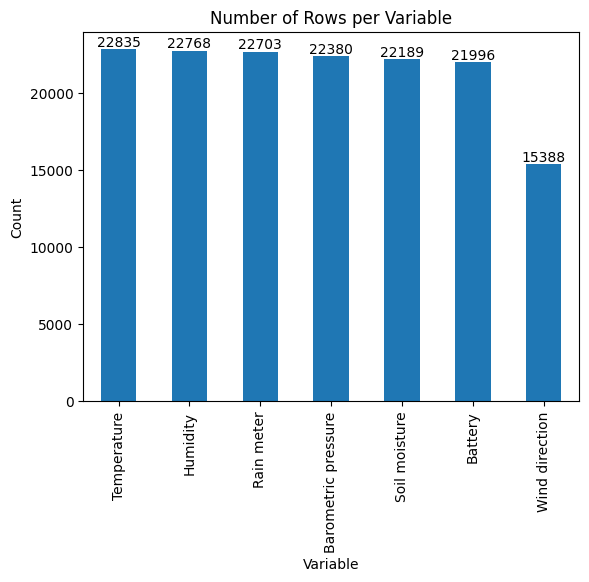

In [ ]:
def plot_variable_counts(dataframe):
    """
    Plots a chart showing the number of rows for each type of variable in the dataframe.

    Args:
        dataframe (pd.DataFrame): The input dataframe containing the data.

    Returns:
        None

    """

    # Count the number of rows for each type of variable
    variable_counts = dataframe['variable'].value_counts()

    # Plot the variable counts
    ax = variable_counts.plot(kind='bar')

    # Set the plot title and labels
    plt.title('Number of Rows per Variable')
    plt.xlabel('Variable')
    plt.ylabel('Count')

    # Add text annotations for the count values
    for i, count in enumerate(variable_counts):
        ax.text(i, count + 1, str(count), ha='center', va='bottom')

    # Display the plot
    plt.show()



plot_variable_counts(sensor1_raw_data)

In [ ]:
def outrange_percentage_by_variable(dataframe):
    """
    Calculates and prints the percentage of false entries by variable.

    Args:
        dataframe (pd.DataFrame): The input dataframe containing the data.

    Returns:
        None

    """

    # Filter the dataframe by rows where within_range is False
    filtered_data = dataframe[dataframe['within_range'] == False]

    # Group the filtered data by variable and count the number of rows
    count_by_variable = filtered_data.groupby('variable')['within_range'].count()

    # Calculate the percentage of false entries by variable
    total_by_variable = dataframe.groupby('variable')['within_range'].count()
    percentage_by_variable = (count_by_variable / total_by_variable).fillna(0) * 100

    # Print the percentage by variable
    print(percentage_by_variable)


outrange_percentage_by_variable(sensor1_raw_data)

variable
Barometric pressure     0.058088
Battery                 0.000000
Humidity               15.513001
Rain meter              0.000000
Soil moisture           0.000000
Temperature             0.000000
Wind direction          0.000000
Name: within_range, dtype: float64


In [ ]:
# Trim the data by removing values outside the range
barometric_data = sensor1_raw_data[sensor1_raw_data['variable'] == 'Barometric pressure']
trimmed_barometric_data = barometric_data[(barometric_data['value'] >= 500) & (barometric_data['value'] <= 1100)]
sensor1_raw_data.loc[sensor1_raw_data['variable'] == 'Barometric pressure', 'value'] = trimmed_barometric_data['value']

humidity_data = sensor1_raw_data[sensor1_raw_data['variable'] == 'Humidity']
trimmed_humidity_data = humidity_data[(humidity_data['value'] >= 0) & (humidity_data['value'] <= 80)]
sensor1_raw_data.loc[sensor1_raw_data['variable'] == 'Humidity', 'value'] = trimmed_humidity_data['value']

# Apply the function to the range column again
sensor1_raw_data.loc[:, 'within_range'] = sensor1_raw_data.apply(lambda row: row['range'][0] <= row['value'] <= row['range'][1], axis=1)

outrange_percentage_by_variable(sensor1_raw_data)

variable
Barometric pressure     0.058088
Battery                 0.000000
Humidity               15.513001
Rain meter              0.000000
Soil moisture           0.000000
Temperature             0.000000
Wind direction          0.000000
Name: within_range, dtype: float64


<ipython-input-9-fab2c8954731>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor1_raw_data.loc[:, 'within_range'] = sensor1_raw_data.apply(lambda row: row['range'][0] <= row['value'] <= row['range'][1], axis=1)


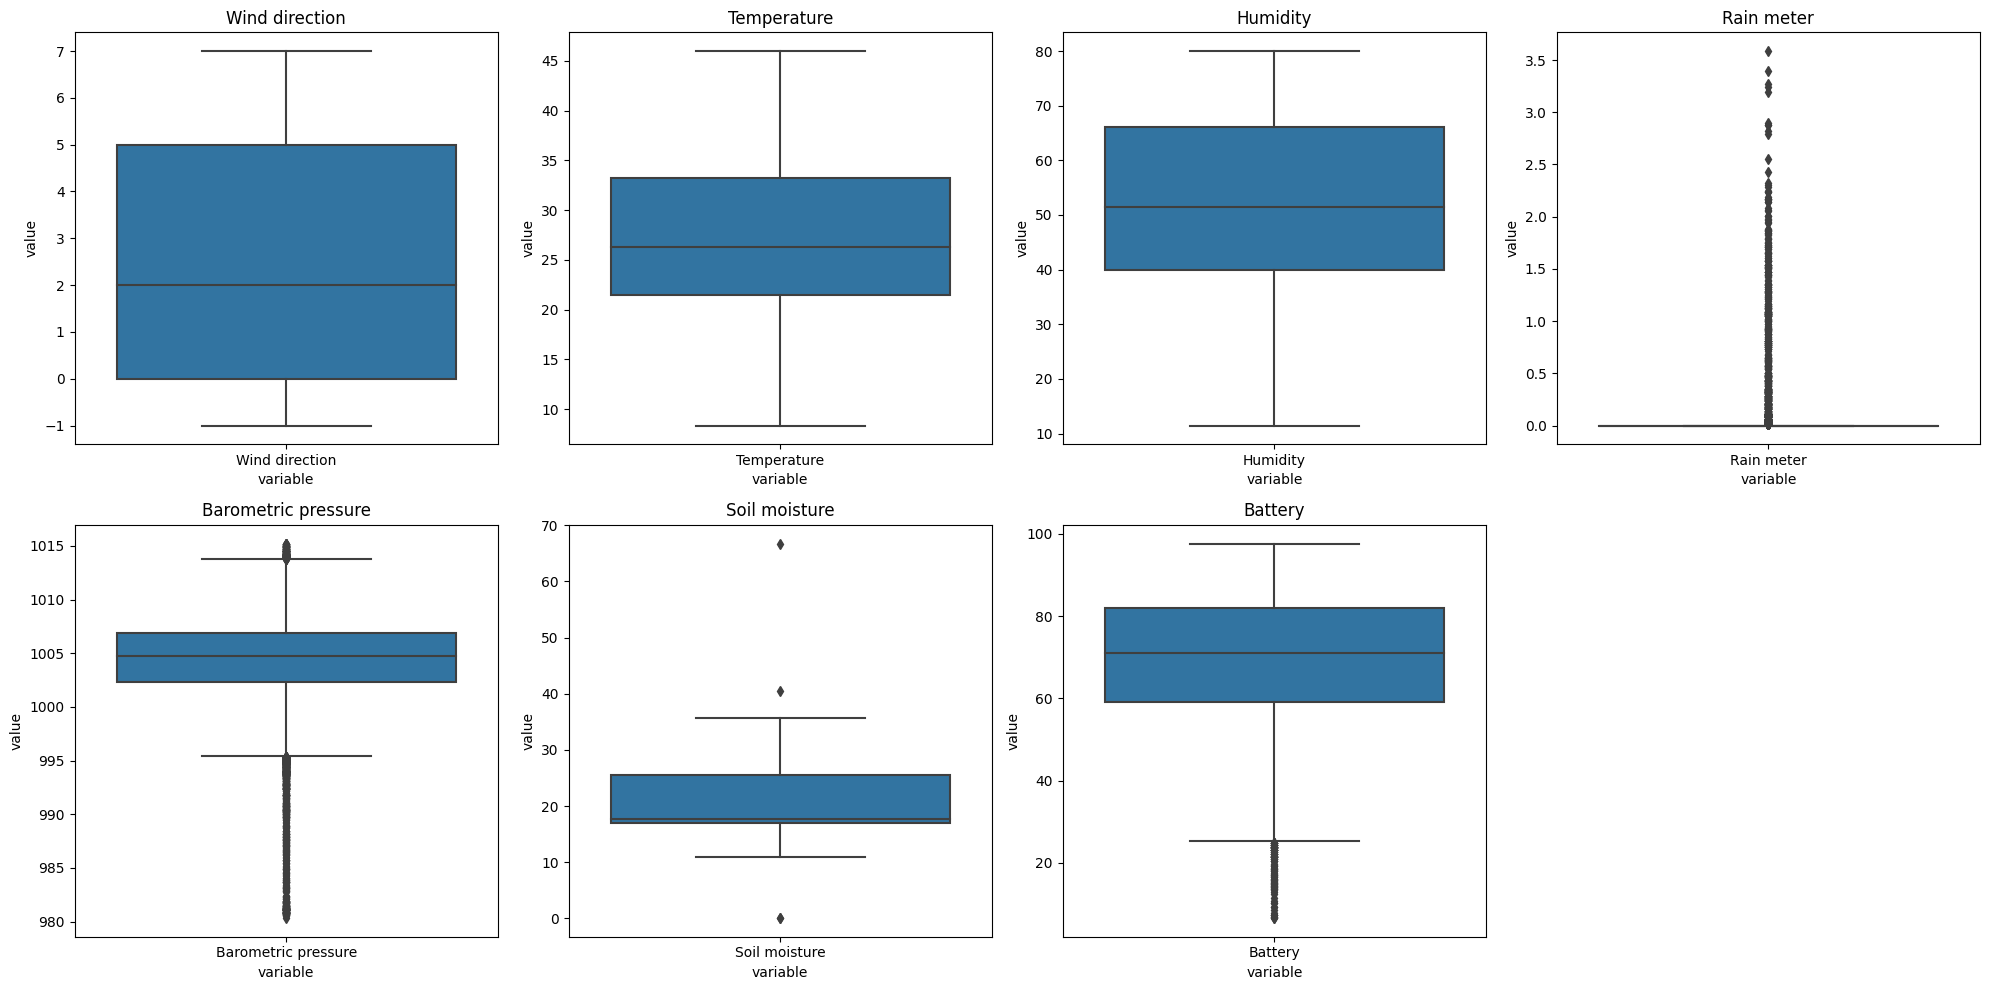

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def print_boxplots(dataframe: pd.DataFrame):
    """
    Creates a grid of box plots for each unique variable in the dataframe.

    Args:
        dataframe (pd.DataFrame): The input dataframe containing the data.

    Returns:
        None: Displays the box plots.

    """

    # Get the unique values in the variable column
    unique_variables = dataframe['variable'].unique()

    # Calculate the number of rows and columns for the subplots grid
    num_rows = (len(unique_variables) + 3) // 4  # Round up to the nearest multiple of 4
    num_cols = min(len(unique_variables), 4)

    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

    # Loop through each unique variable and create a box plot
    for i, variable in enumerate(unique_variables):
        # Filter the data by variable
        variable_data = dataframe[dataframe['variable'] == variable]

        # Calculate the subplot coordinates
        row = i // num_cols
        col = i % num_cols

        # Create the box plot in the current subplot
        sns.boxplot(x=variable_data['variable'], y=variable_data['value'], ax=axes[row, col])
        axes[row, col].set_title(variable)

    # Hide any unused subplots
    for i in range(len(unique_variables), num_rows * num_cols):
        axes.flat[i].set_visible(False)

    # Display the plots
    plt.tight_layout()
    plt.show()


print_boxplots(sensor1_raw_data)

In [ ]:
sensor1_raw_data[sensor1_raw_data['value'].isna()]

value             variable        units        range  \
date                                                                            
2018-04-07 21:07:46.979    NaN             Humidity   Percentage      (0, 80)   
2018-04-07 21:17:47.278    NaN             Humidity   Percentage      (0, 80)   
2018-04-07 21:27:46.117    NaN             Humidity   Percentage      (0, 80)   
2018-04-07 21:37:46.197    NaN             Humidity   Percentage      (0, 80)   
2018-04-07 21:47:47.293    NaN             Humidity   Percentage      (0, 80)   
...                        ...                  ...          ...          ...   
2018-09-14 14:17:36.658    NaN  Barometric pressure  Hectopascal  (500, 1100)   
2018-09-14 14:42:50.079    NaN  Barometric pressure  Hectopascal  (500, 1100)   
2018-09-14 14:54:49.870    NaN  Barometric pressure  Hectopascal  (500, 1100)   
2018-09-14 15:02:21.249    NaN  Barometric pressure  Hectopascal  (500, 1100)   
2018-09-14 17:37:43.019    NaN  Barometric pressure  Hectopascal  (500, 1100)   

                         within_range  
date                                   
2018-04-07 21:07:46.979         False  
2018-04-07 21:17:47.278         False  
2018-04-07 21:27:46.117         False  
2018-04-07 21:37:46.197         False  
2018-04-07 21:47:47.293         False  
...                               ...  
2018-09-14 14:17:36.658         False  
2018-09-14 14:42:50.079         False  
2018-09-14 14:54:49.870         False  
2018-09-14 15:02:21.249         False  
2018-09-14 17:37:43.019         False  

[3545 rows x 5 columns]

In [ ]:
# Round down to the nearest minute
sensor1_raw_data.index = sensor1_raw_data.index.floor('T')

# Discard unnecessary columns
df_simplified = sensor1_raw_data.drop(['units', 'range', 'within_range'], axis=1)

# Use pivot_table and take the mean of measurements within the same minute
df_pivot = df_simplified.pivot_table(index=df_simplified.index, columns='variable', values='value', aggfunc='mean')

# Flatten the columns
df_pivot.columns = df_pivot.columns.get_level_values(0)

# Reset the index
#df_pivot.reset_index(inplace=True)


sensor1_clean_df = df_pivot.drop(['Wind direction'], axis=1)
sensor1_clean_df.dropna(how='all', inplace=True)

sensor1_clean_df

variable             Barometric pressure    Battery   Humidity  Rain meter  \
date                                                                         
2018-04-01 00:04:00          1006.227478  78.789063  23.777527         0.0   
2018-04-01 00:14:00          1006.289978  78.300781  23.869080         0.0   
2018-04-01 00:24:00          1006.539978  77.812500  23.899597         0.0   
2018-04-01 00:34:00          1006.710022  77.484375  24.158997         0.0   
2018-04-01 00:44:00          1006.807495  76.996094  24.326843         0.0   
...                                  ...        ...        ...         ...   
2018-09-14 15:00:00          1010.677490  95.917969  45.445007         0.0   
2018-09-14 15:02:00                  NaN  97.660156  45.071167         0.0   
2018-09-14 15:03:00          1010.542480  97.183594  44.926208         0.0   
2018-09-14 17:27:00          1010.542480  87.351563  49.679321         0.0   
2018-09-14 17:37:00                  NaN  97.660156  57.667297         0.0   

variable             Soil moisture  Temperature  
date                                             
2018-04-01 00:04:00      24.169922    14.325957  
2018-04-01 00:14:00      23.437500    14.325957  
2018-04-01 00:24:00      23.120117    14.304507  
2018-04-01 00:34:00      24.584961    14.079280  
2018-04-01 00:44:00      23.583984    14.047105  
...                            ...          ...  
2018-09-14 15:00:00      17.114258    26.027039  
2018-09-14 15:02:00      17.553711    26.305891  
2018-09-14 15:03:00      17.407227    26.316616  
2018-09-14 17:27:00      17.529297    29.587770  
2018-09-14 17:37:00      17.602539    27.292601  

[23508 rows x 6 columns]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select columns of interest
columns_of_interest = ['Temperature', 'Soil moisture', 'Rain meter', 'Barometric pressure', 'Humidity']
df_subset = sensor1_clean_df[columns_of_interest]

# Initialize the imputer
imp = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer and transform the dataframe subset
df_imputed_subset = imp.fit_transform(df_subset)

# The output is a numpy array, convert it back to a dataframe
df_imputed_subset = pd.DataFrame(df_imputed_subset, columns=df_subset.columns, index=df_subset.index)

# Now merge the imputed subset back into the original dataframe
sensor1_clean_df['Humidity'] = df_imputed_subset['Humidity']

In [ ]:
sensor1_clean_df

variable             Barometric pressure    Battery   Humidity  Rain meter  \
date                                                                         
2018-04-01 00:04:00          1006.227478  78.789063  23.777527         0.0   
2018-04-01 00:14:00          1006.289978  78.300781  23.869080         0.0   
2018-04-01 00:24:00          1006.539978  77.812500  23.899597         0.0   
2018-04-01 00:34:00          1006.710022  77.484375  24.158997         0.0   
2018-04-01 00:44:00          1006.807495  76.996094  24.326843         0.0   
...                                  ...        ...        ...         ...   
2018-09-14 15:00:00          1010.677490  95.917969  45.445007         0.0   
2018-09-14 15:02:00                  NaN  97.660156  45.071167         0.0   
2018-09-14 15:03:00          1010.542480  97.183594  44.926208         0.0   
2018-09-14 17:27:00          1010.542480  87.351563  49.679321         0.0   
2018-09-14 17:37:00                  NaN  97.660156  57.667297         0.0   

variable             Soil moisture  Temperature  
date                                             
2018-04-01 00:04:00      24.169922    14.325957  
2018-04-01 00:14:00      23.437500    14.325957  
2018-04-01 00:24:00      23.120117    14.304507  
2018-04-01 00:34:00      24.584961    14.079280  
2018-04-01 00:44:00      23.583984    14.047105  
...                            ...          ...  
2018-09-14 15:00:00      17.114258    26.027039  
2018-09-14 15:02:00      17.553711    26.305891  
2018-09-14 15:03:00      17.407227    26.316616  
2018-09-14 17:27:00      17.529297    29.587770  
2018-09-14 17:37:00      17.602539    27.292601  

[23508 rows x 6 columns]

In [ ]:
# Perform time-based interpolation on the dataframe
sensor1_clean_df = sensor1_clean_df.interpolate(method='time')

# round all values in the DataFrame to 2 decimal places
sensor1_clean_df = sensor1_clean_df.round(2)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Add a line for each sensor
for column in sensor1_clean_df.columns:
    fig.add_trace(go.Scatter(
        x=sensor1_clean_df.index,
        y=sensor1_clean_df[column],
        mode='lines',
        name=column
    ))

fig.update_layout(title='Sensor Readings over Time',
                  xaxis_title='Time',
                  yaxis_title='Sensor Readings')

fig.show()


In [ ]:
lat_lon = pd.read_csv('../src/data/200034001951343334363036_raw_data.csv', usecols=["geo_lat", "geo_lon"], nrows=1)
lat_lon

geo_lat   geo_lon
0  40.113898 -0.051908

In [ ]:
import requests
import pandas as pd
import numpy as np

# Function to retrieve day length for a given date, latitude, and longitude
def get_day_length(latitude, longitude, date):
    url = f"https://api.sunrise-sunset.org/json?lat={latitude}&lng={longitude}&date={date}"
    response = requests.get(url)
    sunrise_sunset = response.json()
    return sunrise_sunset.get('results', {}).get('day_length', '')

# Read latitude and longitude from the provided DataFrame
lat_lon = pd.read_csv('../src/data/200034001951343334363036_raw_data.csv', usecols=["geo_lat", "geo_lon"], nrows=1)

latitude = lat_lon['geo_lat'].values[0]
longitude = lat_lon['geo_lon'].values[0]

# Get unique dates in the DataFrame
unique_dates = np.unique(sensor1_clean_df.index.date).tolist()
unique_dates_str = [date.strftime('%Y-%m-%d') for date in unique_dates]

# Create a dictionary to store day lengths for each date
day_length_dict = {}

# Iterate over unique dates and retrieve day length (only make API call once per unique date)
for date in unique_dates:
    day_length = get_day_length(latitude, longitude, str(date))
    day_length_dict[str(date)] = day_length

# Convert day lengths to minutes
day_length_minutes = {date: int(day_length.split(':')[0]) * 60 + int(day_length.split(':')[1]) for date, day_length in day_length_dict.items()}

# Convert day lengths to datetime
day_length_date = {pd.to_datetime(k).date(): v for k, v in day_length_minutes.items()}  # Ensure dictionary keys are date objects

# Map day lengths to a new column in the DataFrame based on the date
sensor1_clean_df['day_length'] = sensor1_clean_df.index.to_series().apply(lambda x: pd.Series(day_length_date).get(x.date(), None))

# Display the updated DataFrame
sensor1_clean_df


variable             Barometric pressure  Battery  Humidity  Rain meter  \
date                                                                      
2018-04-01 00:04:00              1006.23    78.79     23.78         0.0   
2018-04-01 00:14:00              1006.29    78.30     23.87         0.0   
2018-04-01 00:24:00              1006.54    77.81     23.90         0.0   
2018-04-01 00:34:00              1006.71    77.48     24.16         0.0   
2018-04-01 00:44:00              1006.81    77.00     24.33         0.0   
...                                  ...      ...       ...         ...   
2018-09-14 15:00:00              1010.68    95.92     45.45         0.0   
2018-09-14 15:02:00              1010.59    97.66     45.07         0.0   
2018-09-14 15:03:00              1010.54    97.18     44.93         0.0   
2018-09-14 17:27:00              1010.54    87.35     49.68         0.0   
2018-09-14 17:37:00              1010.54    97.66     57.67         0.0   

variable             Soil moisture  Temperature  day_length  
date                                                         
2018-04-01 00:04:00          24.17        14.33         762  
2018-04-01 00:14:00          23.44        14.33         762  
2018-04-01 00:24:00          23.12        14.30         762  
2018-04-01 00:34:00          24.58        14.08         762  
2018-04-01 00:44:00          23.58        14.05         762  
...                            ...          ...         ...  
2018-09-14 15:00:00          17.11        26.03         753  
2018-09-14 15:02:00          17.55        26.31         753  
2018-09-14 15:03:00          17.41        26.32         753  
2018-09-14 17:27:00          17.53        29.59         753  
2018-09-14 17:37:00          17.60        27.29         753  

[23508 rows x 7 columns]